In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data128633


# 作业评分说明
- [x] 1.格式规范（有至少3个小标题，内容完整），一个小标题5分，最高20分
- [x] 2.图文并茂，一张图5分，最高20分
- [x] 3.有可运行的代码，且代码内有详细注释，20分
- [x] 4.代码开源到github，15分
- [x] 5.代码同步到gitee，5分

# 作业内容

## 一、项目背景介绍

该部分主要向大家介绍你的项目目前社会研究情况，研究热度，或者用简短精炼的语言让大家理解为什么要做出这个项目
### 1.选择[文案营销数据集](https://aistudio.baidu.com/aistudio/datasetdetail/128633)数据集
自己的数据集 数据来源是文案营销数据集（5万组数据）
### 2.项目背景/意义重大
对于社媒营销系统来说，文案的编写是费人费事的，而现在NLP的生成很强大，所以采用生成模型减轻人工的工作，节省人力成本。


## 二、数据介绍
数据来源是文案营销数据集（5万组数据）。
### 1.总览：
数据格式如下：
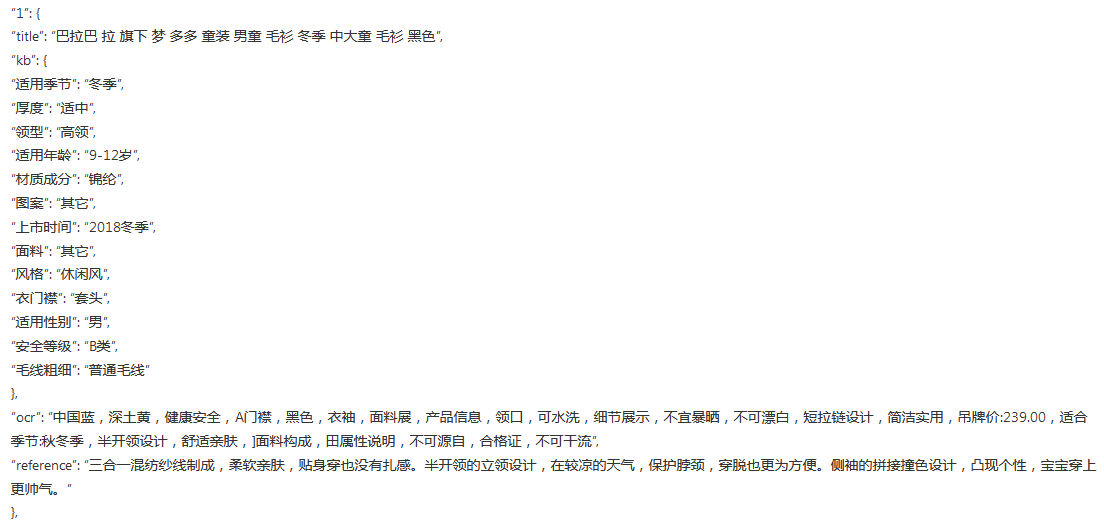

### 2.查看和预处理

#### 2.2.1 linux查看数据

In [5]:
# 查看数据
!ls /home/aistudio/data/data128633/
!ls /home/aistudio/work
!ls /home/aistudio/data/data128633/
!tree  /home/aistudio/data/data128633/
!head -21  /home/aistudio/data/data128633/服饰数据.json

服饰_50k.json  服饰数据.json
服饰_50k.json  服饰数据.json
/home/aistudio/data/data128633/
├── 服饰_50k.json
└── 服饰数据.json

0 directories, 2 files
{
    "1": {
        "title": "巴拉巴 拉 旗下 梦 多多 童装 男童 毛衫 冬季 中大童 毛衫 黑色",
        "kb": {
            "适用季节": "冬季",
            "厚度": "适中",
            "领型": "高领",
            "适用年龄": "9-12岁",
            "材质成分": "锦纶",
            "图案": "其它",
            "上市时间": "2018冬季",
            "面料": "其它",
            "风格": "休闲风",
            "衣门襟": "套头",
            "适用性别": "男",
            "安全等级": "B类",
            "毛线粗细": "普通毛线"
        },
        "ocr": "中国蓝，深土黄，健康安全，A门襟，黑色，衣袖，面料展，产品信息，领口，可水洗，细节展示，不宜暴晒，不可漂白，短拉链设计，简洁实用，吊牌价:239.00，适合季节:秋冬季，半开领设计，舒适亲肤，]面料构成，田属性说明，不可源自，合格证，不可干流",
        "reference": "三合一混纺纱线制成，柔软亲肤，贴身穿也没有扎感。半开领的立领设计，在较凉的天气，保护脖颈，穿脱也更为方便。侧袖的拼接撞色设计，凸现个性，宝宝穿上更帅气。"
    },


#### 2.2.2 数据预处理和分割数据集

In [6]:
# 在可视化之前，首先先把数据预处理一下，并分出数据集
import json
import jieba
samples = set()
# Read json file.
json_path = '/home/aistudio/data/data128633/服饰_50k.json'
with open(json_path, 'r', encoding='utf8') as file:
    jsf = json.load(file)
for jsobj in jsf.values():
    title = jsobj['title'] + ' '  # Get title.
    kb = dict(jsobj['kb']).items()  # Get attributes.
    kb_merged = ''
    for key, val in kb:
        kb_merged += key+' '+val+' '  # Merge attributes.
    ocr = ' '.join(list(jieba.cut(jsobj['ocr'])))  # Get OCR text.
    texts = []
    texts.append(title + ocr + kb_merged)  # Merge them.
    reference = ' '.join(list(jieba.cut(jsobj['reference'])))
    for text in texts:
        text=text.replace('\t',' ').replace('、','').replace('”','').replace('(','').replace(')','').replace(';',' ').replace('“',' ').replace('°',' ').replace('，','').replace('。\n',' ').replace(':',' ').replace('。',' ').replace('：','').replace('/',' ').replace('  ',' ').replace('  ',' ') 
        reference=reference.replace('\t',' ').replace('、','').replace('”','').replace('(','').replace(')','').replace(';',' ').replace('“',' ').replace('°',' ').replace('，','').replace('。\n',' ').replace(':',' ').replace('。',' ').replace('：','').replace('/',' ').replace('  ',' ').replace('  ',' ') 
        sample = text+'\t'+reference  # Seperate source and reference.
        samples.add(sample)
print(len(samples))
with open('/home/aistudio/data/data128633/服饰_50k.txt', 'w', encoding='utf8') as file:
    for line in samples:
        file.write(line)
        file.write('\n')
import random
with open('/home/aistudio/work/train_50k.txt', 'w', encoding='utf8') as trainf, open('/home/aistudio/work/dev_50k.txt', 'w', encoding='utf8') as devf, open('/home/aistudio/work/test_50k.txt', 'w', encoding='utf8') as testf:
    for line in samples:
        tmp=random.random()
        if tmp<0.7:
            trainf.write(line)
            trainf.write('\n')
        elif  tmp<0.9:
            devf.write(line)
            devf.write('\n')
        else:
            testf.write(line)
            testf.write('\n')

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.864 seconds.
Prefix dict has been built successfully.


49996


#### 2.2.3 词云展示

In [7]:
!pip install wordcloud
# 安装词云，并打印数据，查看一下分布

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 366 kB 7.9 MB/s            
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


In [18]:
# jieba进行文本数据的分词 #这一步不需要做，因为上面数据处理中已经有了
import jieba
from jieba import analyse
# 词云可视化
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
with open('/home/aistudio/data/data128633/服饰_50k.txt', mode='r', encoding='utf-8') as f:
    text = f.readlines()
def tongji(lines,index):    
    print(f'========第{index}条数据=====')
    # print('/ '.join(lines[index].split(' ')))
    extract_tags = analyse.extract_tags(lines[index], withWeight=True)
    for i, j in extract_tags:
        pass #print(i, j)
    result = {}
    for word in extract_tags:
        result[word[0]] = word[1]
    wordcloud = WordCloud(
        background_color="white",
        max_font_size=50,
        font_path='/home/aistudio/work/simkai.ttf')
        #
    wordcloud.generate_from_frequencies(result)

    plt.figure()
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

# !pip install wordcloud

========第1条数据=====


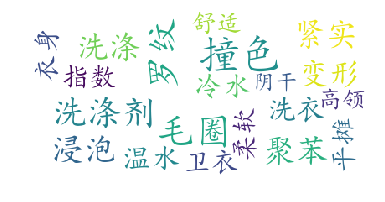

========第2条数据=====


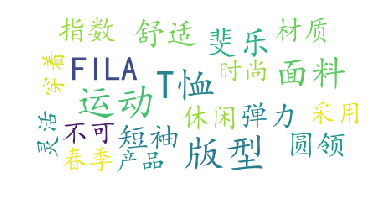

========第3条数据=====


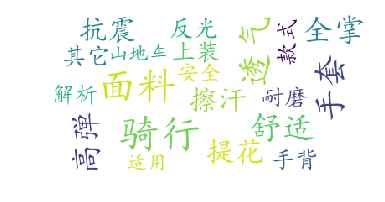

========第4条数据=====


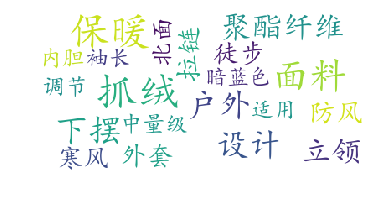

========第5条数据=====


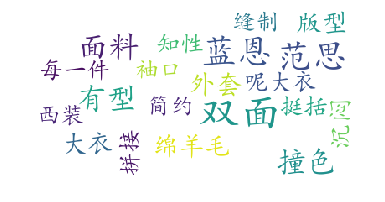

In [19]:
tongji(text,1)
tongji(text,2)
tongji(text,3)
tongji(text,4)
tongji(text,5)

#### 2.2.4 为模型构建词典等统计数据

In [22]:
#这边多统计一些数据
# 50k的词汇的dic
from collections import Counter
word_c={}
lenx=[]
leny=[]
word2count = Counter()
# with open('/home/aistudio/data/data128633/sam服饰数据.txt', mode='r', encoding='utf-8') as f:
with open('/home/aistudio/data/data128633/服饰_50k.txt', mode='r', encoding='utf-8') as f:
    texts = f.readlines()
    for line in texts:
        # print(line)
        line=line
        ss=line.split('\t')
        if len(ss)!=2:continue
        xlst,ylst=ss[0].strip().split(" ") ,ss[1].strip().split(" ")
        # print(xlst,ylst)
        lenx.append(len(xlst))
        leny.append(len(ylst))
        for i in xlst+ylst:
            if i in word_c.keys():
                word_c[i]=word_c[i]+1
            else:
                word_c[i]=1
print(max(lenx),max(leny))
print(len(word_c))
# 将这个词典中的词，按照出现次数排序，出现次数越高，排序越靠前
# 一般来说，出现频率高的高频词往往是：I，the，you这种代词，而出现频率低的词，往往是一些名词，如：nlp
word_freq_dict = sorted(word_c.items(), key = lambda x:x[1], reverse = True)
# 构造3个不同的词典，分别存储，
# 每个词到id的映射关系：word2id_dict
# 每个id到词的映射关系：id2word_dict
#word2id_dict.get('<start>')
word2id_dict = {'<pad>':0,'<unk>':1,'<start>':2}
id2word_dict = {0:'<pad>',1:'<unk>',2:'<start>'}
# 按照频率，从高到低，开始遍历每个单词，并为这个单词构造一个独一无二的id
frequency=4 #共计95755个词，超过4个频率的词是31609
for word, freq in word_freq_dict:
    if freq>frequency:
        curr_id = len(word2id_dict)
        word2id_dict[word] = curr_id
        id2word_dict[curr_id] = word
    else:
        word2id_dict[word]=1
print("超过4个频率的词:",len(id2word_dict)-3)
print("共计:",len(word2id_dict)-3)
print("前5个高频词：",word_freq_dict[:5])
# baocun
import pickle
def save_obj(obj, name ):
    with open('/home/aistudio/work/obj-'+name+'.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('/home/aistudio/work/obj-' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
save_obj(word_freq_dict,"word_freq_dict")
save_obj(word2id_dict,"word2id_dict")
save_obj(id2word_dict,"id2word_dict")
print(load_obj("word_freq_dict")[:6])

276 56
95755
超过4个频率的词: 31609
共计: 95755
前5个高频词： [('的', 324132), ('设计', 111486), ('面料', 107355), ('舒适', 86106), ('展示', 59808)]
[('的', 324132), ('设计', 111486), ('面料', 107355), ('舒适', 86106), ('展示', 59808), ('指数', 55554)]


### 3.数据集类的定义（继承paddle.io.Dataset的类）


In [ ]:
import paddle
print(paddle.vision)

In [2]:
import sys 
sys.path.append('/home/aistudio/external-libraries')
import numpy as np
import pickle
import paddle
import paddle.vision.transforms as T
print("---")
class MyYingxiaoDataset(paddle.io.Dataset):
    def __init__(self,
                 file_path='/home/aistudio/data/data128633/服饰数据_50k.txt', #抽样
                 x_max_len=240, # x最大长度
                 y_max_len=50, # y最大长度
                 word2id_dict_pkl_path='work/obj-word2id_dict.pkl' # pkl的路径
                 ):
        super(MyYingxiaoDataset, self).__init__()
        self.x =[]  # x数据
        self.y=[] #y数据
        self.xl =[]  # x有效长度数据
        self.yl= [] #y有效长度数据
        word2id_dict={}
        print("预设填充或截断的XY长度：",x_max_len,y_max_len)
        with open(word2id_dict_pkl_path, 'rb') as f:
            word2id_dict= pickle.load(f)
        with open(file_path, mode='r', encoding='utf-8') as f:
        # with open('/home/aistudio/data/data128633/服饰_50k.txt', mode='r', encoding='utf-8') as f:
            texts = f.readlines()
            for line in texts:
                # print(line)
                line=line
                ss=line.split('\t')
                if len(ss)!=2:continue
                xlst,ylst=ss[0].strip().split(" ") ,ss[1].strip().split(" ")
                xid=[ word2id_dict.get(v, 0)  for v in xlst]+[0]*x_max_len
                yid=[ word2id_dict.get(v, 0)  for v in ylst]+[0]*y_max_len
                self.x.append(xid[:x_max_len])
                self.y.append(yid[:y_max_len])
                self.xl.append(min(x_max_len,len(xlst)))
                self.yl.append(min(y_max_len,len(ylst)))
        self.lenall=len(self.xl)
        print('样本数目：',self.lenall)

    def __getitem__(self, index):
        return paddle.to_tensor(self.x[index]),paddle.to_tensor(self.xl[index]),paddle.to_tensor(self.y[index]),paddle.to_tensor(self.yl[index])

    def __len__(self):
        return self.lenall

---


In [5]:
print(paddle.vision)
file_path='/home/aistudio/work/dev_50k.txt'
x_max_len=240 # x最大长度
y_max_len=30 # y最大长度
train_dataset = MyYingxiaoDataset( file_path=file_path,
                 x_max_len=x_max_len, # x最大长度
                 y_max_len=y_max_len, # y最大长度
                 word2id_dict_pkl_path='work/obj-word2id_dict.pkl' # pkl的路径
                 )

index=9
with open(file_path, mode='r', encoding='utf-8') as f:
    texts = f.readlines()[index]
xs,ys=texts.split('\t')
print("预设填充或截断的XY长度：",x_max_len,y_max_len)
print("原始某条数据的XY长度：",len(xs.strip().split(" ")),len(ys.strip().split(" ")))
x,xl,y,yl = train_dataset[index]
print("Dataset某条数据的XY长度：",xl,yl)
print("Dataset某条填充或截断后数据的XY长度：",x.shape,y.shape)
print(len(train_dataset))
print(x,xl,y,yl)
for x,xl,y,yl in train_dataset:
    print(x.shape,xl.shape,y.shape,yl.shape)
    break

<module 'paddle.vision' from '/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/vision/__init__.py'>
预设填充或截断的XY长度： 240 30
样本数目： 9993
预设填充或截断的XY长度： 240 30
原始某条数据的XY长度： 211 29
Dataset某条数据的XY长度： Tensor(shape=[1], dtype=int64, place=CPUPlace, stop_gradient=True,
       [211]) Tensor(shape=[1], dtype=int64, place=CPUPlace, stop_gradient=True,
       [29])
Dataset某条填充或截断后数据的XY长度： [240] [30]
9993
Tensor(shape=[240], dtype=int64, place=CPUPlace, stop_gradient=True,
       [3263, 755 , 65  , 1446, 308 , 362 , 56  , 371 , 24  , 1380, 659 , 2935,
        35  , 3263, 113 , 2223, 127 , 906 , 829 , 1931, 5211, 869 , 2577, 2101,
        13  , 7   , 25  , 374 , 25  , 7   , 351 , 2184, 906 , 829 , 251 , 26  ,
        897 , 709 , 2977, 1225, 2730, 3225, 386 , 327 , 43  , 613 , 1877, 734 ,
        740 , 144 , 659 , 859 , 177 , 96  , 1908, 38  , 19  , 276 , 280 , 10  ,
        122 , 906 , 829 , 47  , 4   , 357 , 3   , 145 , 55  , 336 , 507 , 3   ,
        56  , 561 , 495 , 351 , 21

## 四 模型训练
### 1.数据处理

#### 4.1.1 构建dataset

In [ ]:
# 首先，数据处理一下
x_max_len=240 # x最大长度
y_max_len=50 # y最大长度
train_dataset = MyYingxiaoDataset( file_path='/home/aistudio/work/train_50k.txt',
                 x_max_len=x_max_len, # x最大长度
                 y_max_len=y_max_len, # y最大长度
                 word2id_dict_pkl_path='work/obj-word2id_dict.pkl' # pkl的路径
                 )
val_dataset = MyYingxiaoDataset( file_path='/home/aistudio/work/dev_50k.txt',
                 x_max_len=x_max_len, # x最大长度
                 y_max_len=y_max_len, # y最大长度
                 word2id_dict_pkl_path='work/obj-word2id_dict.pkl' # pkl的路径
                 )
test_dataset = MyYingxiaoDataset( file_path='/home/aistudio/work/test_50k.txt',
                 x_max_len=x_max_len, # x最大长度
                 y_max_len=y_max_len, # y最大长度
                 word2id_dict_pkl_path='work/obj-word2id_dict.pkl' # pkl的路径
                 )

#### 4.1.2 dataloader

In [6]:

# 测试定义的数据集
BATCH_SIZE=128
train_loader = paddle.io.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)
val_loader=paddle.io.DataLoader(val_dataset,batch_size=BATCH_SIZE,shuffle=True,drop_last=True)
test_loader=paddle.io.DataLoader(test_dataset,batch_size=BATCH_SIZE,shuffle=True,drop_last=True)
example_x,xl, example_y ,yl = next(iter(val_loader))
print(example_x.shape)
print(example_y.shape)
print(example_y[:,:1].shape)
print(len(train_loader))

预设填充或截断的XY长度： 240 50
样本数目： 34964
预设填充或截断的XY长度： 240 50
样本数目： 9993
预设填充或截断的XY长度： 240 50
样本数目： 5039
[128, 240]
[128, 50]
[128, 1]
273


### 2模型组网

In [7]:
# 注意力机制使用的是Bahdanau提出的注意力机制计算方法
class Encoder(paddle.nn.Layer):
    def __init__(self, vocab_size, embed_dim, hidn_size,rate=0.2):
        super(Encoder, self).__init__()
        self.embedder = paddle.nn.Embedding(vocab_size, embed_dim)
        self.gru = paddle.nn.GRU(input_size=embed_dim,hidden_size=hidden_size,dropout=rate)
    def forward(self, sequence):
        inputs = self.embedder(sequence)
        encoder_output, encoder_state = self.gru(inputs)   
        # encoder_output [128, 18, 256]  [batch_size, time_steps, hidden_size]
        # encoder_state [num_layer*drection,batch_size,hidden_size]  num_layer*drection=1*1=1
        return encoder_output, encoder_state
class BahdanauAttention(paddle.nn.Layer):
    def __init__(self, hidden_size):
      super(BahdanauAttention, self).__init__()
      self.W1 = paddle.nn.Linear(hidden_size,hidden_size)
      self.W2 = paddle.nn.Linear(hidden_size,hidden_size)
      self.V = paddle.nn.Linear(hidden_size,1)
    def forward(self, hidden , encoder_out):
      # hidden 隐藏层的形状 == （1,批大小，隐藏层大小）
      hidden = paddle.transpose(hidden, perm=[1, 0, 2]) #[batch_size,1,hidden_size]
      # encoder_out [batch_size,seq_len, hidden_size]
      # 分数的形状 == （批大小，最大长度，1）
      # 我们在最后一个轴上得到 1， 因为我们把分数应用于 self.V
      # 在应用 self.V 之前，张量的形状是（批大小，最大长度，单位）
      score = self.V(paddle.nn.functional.tanh(self.W1(encoder_out) + self.W2(hidden)))
      # 注意力权重 （attention_weights） 的形状 == （批大小，最大长度，1）
      attention_weights = paddle.nn.functional.softmax(score, axis=1)
      # 上下文向量 （context_vector） 求和之后的形状 == （批大小，隐藏层大小）
      context_vector = attention_weights * encoder_out
      context_vector = paddle.sum(context_vector, axis=1)
      return context_vector
class Decoder(paddle.nn.Layer):
    def __init__(self, vocab_size, embedding_dim, hidden_size,rate=0.2):
        super(Decoder, self).__init__()
        self.embedding = paddle.nn.Embedding(vocab_size, embedding_dim)
        self.gru = paddle.nn.GRU(input_size=embedding_dim+hidden_size,hidden_size=hidden_size,dropout=rate)                          
        self.fc = paddle.nn.Linear(hidden_size,vocab_size)
        # 用于注意力
        self.attention = BahdanauAttention(hidden_size)
    def forward(self, x, hidden, enc_output):
        # 编码器输出 （enc_output） 的形状 == （批大小，最大长度，隐藏层大小）
        context_vector= self.attention(hidden, enc_output)  #[batch_size,hideen_size]
        # x 在通过嵌入层后的形状 == （批大小，1，嵌入维度）
        x = self.embedding(x)
        # x 在拼接 （concatenation） 后的形状 == （批大小，1，嵌入维度 + 隐藏层大小）
        x = paddle.concat([paddle.unsqueeze(context_vector, 1), x], axis=-1)
        # 将合并后的向量传送到 GRU
        output, state = self.gru(x)
        # 输出的形状 == （批大小 * 1，隐藏层大小）
        output = paddle.reshape(output, (-1, output.shape[2]))
        # 输出的形状 == （批大小，vocab）
        x = self.fc(output)
        return x, state

### 3配置超参数，训练模型


In [8]:
import pickle

def save_obj(obj, name ):
    with open('/home/aistudio/work/obj-'+name+'.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('/home/aistudio/work/obj-' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
word2id_dict=load_obj("word2id_dict")
id2word_dict=load_obj("id2word_dict")

In [10]:
import time
EPOCHS = 10

embedding_size=256 # 
hidden_size=256 # 

max_grad_norm=5.0
learning_rate=0.001

train_batch_num=len(train_loader)
val_batch_num=len(val_loader)

vocab_size=len(id2word_dict)
droprate=0.1
encoder=Encoder(vocab_size,embedding_size,hidden_size,droprate)
decoder=Decoder(vocab_size,embedding_size,hidden_size,droprate)

# 优化器
clip = paddle.nn.ClipGradByGlobalNorm(clip_norm=max_grad_norm)
optim = paddle.optimizer.Adam(parameters=encoder.parameters()+decoder.parameters(),grad_clip=clip)
# 自定义loss函数，消除padding的0的影响
def getloss(predict, label):
    cost = paddle.nn.functional.cross_entropy(predict,label,reduction='none')
    zeo=paddle.zeros(label.shape,label.dtype)
    mask=paddle.cast(paddle.logical_not(paddle.equal(label,zeo)),dtype=predict.dtype)
    cost *=  mask
    return paddle.mean(cost)

In [11]:
# 训练
def train_step(inp, targ):
    loss = 0
    enc_output, enc_hidden = encoder(inp)
    dec_hidden = enc_hidden
    dec_input = paddle.unsqueeze(paddle.to_tensor([word2id_dict.get('<start>')] * BATCH_SIZE), 1)
    # 教师强制 - 将目标词作为下一个输入
    for t in range(1, targ.shape[1]):
        # 将编码器输出 （enc_output） 传送至解码器
        predictions, dec_hidden= decoder(dec_input, dec_hidden, enc_output)
        loss += getloss(predictions,targ[:, t])
        # 使用教师强制
        dec_input =paddle.unsqueeze(targ[:, t], 1)
    batch_loss = (loss / int(targ.shape[1]))
    batch_loss.backward()
    optim.step()
    optim.clear_grad()
    return batch_loss
# 验证
def val_step(inp, targ):
    loss = 0
    enc_output, enc_hidden = encoder(inp)
    dec_hidden = enc_hidden
    dec_input = paddle.unsqueeze(paddle.to_tensor([word2id_dict.get('<start>')] * BATCH_SIZE), 1)
    # 教师强制 - 将目标词作为下一个输入
    for t in range(1, targ.shape[1]):
        # 将编码器输出 （enc_output） 传送至解码器
        predictions, dec_hidden= decoder(dec_input, dec_hidden, enc_output)
        loss += getloss(predictions,targ[:, t])
        # 使用教师强制
        dec_input =paddle.unsqueeze(targ[:, t], 1)
    batch_loss = (loss / int(targ.shape[1]))
    # 下面这行不能注释掉，否则GPU的显存会爆掉，有大佬知道为什么吗？
    batch_loss.backward()
    optim.clear_grad()
    return batch_loss

In [14]:
train_loss_list=[]
val_loss_list=[]
EPOCHS = 10

def train():
    pre_dev_loss=1000000
    for epoch in range(EPOCHS):
        start = time.time()

        train_total_loss = 0

        encoder.train()
        decoder.train()

        for (batch, (inp,_, targ,_)) in enumerate(train_loader):
            batch_loss = train_step(inp, targ)
            train_total_loss += batch_loss

            if batch % 100 == 0:
                print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,batch,batch_loss.numpy()[0]))
        train_loss_list.append(train_total_loss.numpy()[0]/ train_batch_num)                                        
        print('train Epoch {} avaLoss {:.4f}'.format(epoch + 1,train_total_loss.numpy()[0] / train_batch_num))

        encoder.eval()
        decoder.eval()
        val_total_loss=0
        
        for (batch, (inp,_, targ,_)) in enumerate(val_loader):
            #print(batch,inp.shape,targ.shape)
            batch_loss = val_step(inp, targ)
        
            val_total_loss += batch_loss

            if batch % 20 == 0:
                print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,batch,batch_loss.numpy()[0]))
        val_loss_now=val_total_loss.numpy()[0] / val_batch_num
        if val_loss_now<pre_dev_loss:
            pre_dev_loss=val_loss_now
            paddle.save(encoder.state_dict(), "work/output/encoder.pdparams")
            paddle.save(decoder.state_dict(), "work/output/decoder.pdparams")
            paddle.save(optim.state_dict(), "work/output/optim.pdopt")
            print("stored!")

        val_loss_list.append(val_loss_now)                                                   
        print('val Epoch {} avaLoss {:.4f}'.format(epoch + 1,val_loss_now))
                
        print('Time taken for 1 epoch {}h\n'.format((time.time() - start)/3600))

In [ ]:
train() #注意。这里上传权重接着训练

## 五 模型评估
包含在训练中

In [ ]:
print(val_loss_list)

## 其他部分

### aistudio链接 (https://aistudio.baidu.com/aistudio/projectdetail/3571825)

### github链接 (https://github.com/yuanyihan/aipp)

### gitee链接 (https://gitee.com/yuanyihan/aipp)
